In [21]:
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [22]:
df = pd.read_csv("C:/Users/138577/Desktop/preds/all_sales_final.csv")

In [23]:
df = df.loc[df['sales_channel'] == "RETAIL"]

In [24]:
len(df)

744

In [25]:
train=df[0:len(df)]
test=pd.DataFrame(columns=['sdate', 'sales_channel', 'ordercount', 'product_release', 'holiday'])

In [26]:
train.tail()

,sdate,sales_channel,ordercount,product_release,holiday
1900,2019-05-24,RETAIL,2433,0,0
1905,2019-05-25,RETAIL,2677,0,0
1909,2019-05-26,RETAIL,1364,0,0
1913,2019-05-27,RETAIL,1608,0,0
1914,2019-05-28,RETAIL,1592,0,0


In [27]:
test.tail()

,sdate,sales_channel,ordercount,product_release,holiday


In [28]:
df.Timestamp = pd.to_datetime(df.sdate,format='%Y-%m-%d') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.sdate,format='%Y-%m-%d') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.sdate,format='%Y-%m-%d') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [29]:
test.tail()

,sdate,sales_channel,ordercount,product_release,holiday
sdate,,,,,


In [30]:
train.tail()


,ordercount,product_release,holiday
sdate,,,
2019-05-24,2433,0,0
2019-05-25,2677,0,0
2019-05-26,1364,0,0
2019-05-27,1608,0,0
2019-05-28,1592,0,0


In [31]:
df['Weekday'] = df.index.dayofweek
train['Weekday'] = train.index.dayofweek
test['Weekday'] = test.index.dayofweek

In [32]:
train.head()

,ordercount,product_release,holiday,Weekday
sdate,,,,
2017-05-15,1,0,0,0
2017-05-16,5,0,0,1
2017-05-17,3,0,0,2
2017-05-18,7,0,0,3
2017-05-19,6,0,0,4


In [33]:
exog = train.iloc[:,1:4]


In [34]:
maxd = (str(df.index.max() + pd.to_timedelta(1, unit='D'))[:10])

In [39]:
import datetime
from dateutil.relativedelta import *
import calendar

start = datetime.datetime.strptime(maxd, "%Y-%m-%d")
date_list = [start + relativedelta(days=x) for x in range(60)]
future = pd.DataFrame(index=date_list, columns= df.columns)
#test = pd.concat([test, future])
future['Weekday'] = future.index.dayofweek
values = {'product_release': 0, 'holiday': 0}
future = future.fillna(value=values)

In [40]:
maxd60 = (str(future.index.max())[:10])

In [41]:
future.head()

,ordercount,product_release,holiday,Weekday
2019-05-29,NaN,0,0,2
2019-05-30,NaN,0,0,3
2019-05-31,NaN,0,0,4
2019-06-01,NaN,0,0,5
2019-06-02,NaN,0,0,6
2019-06-03,NaN,0,0,0
2019-06-04,NaN,0,0,1
2019-06-05,NaN,0,0,2
2019-06-06,NaN,0,0,3
2019-06-07,NaN,0,0,4


In [42]:
len(future)

60

C:\Users\138577\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


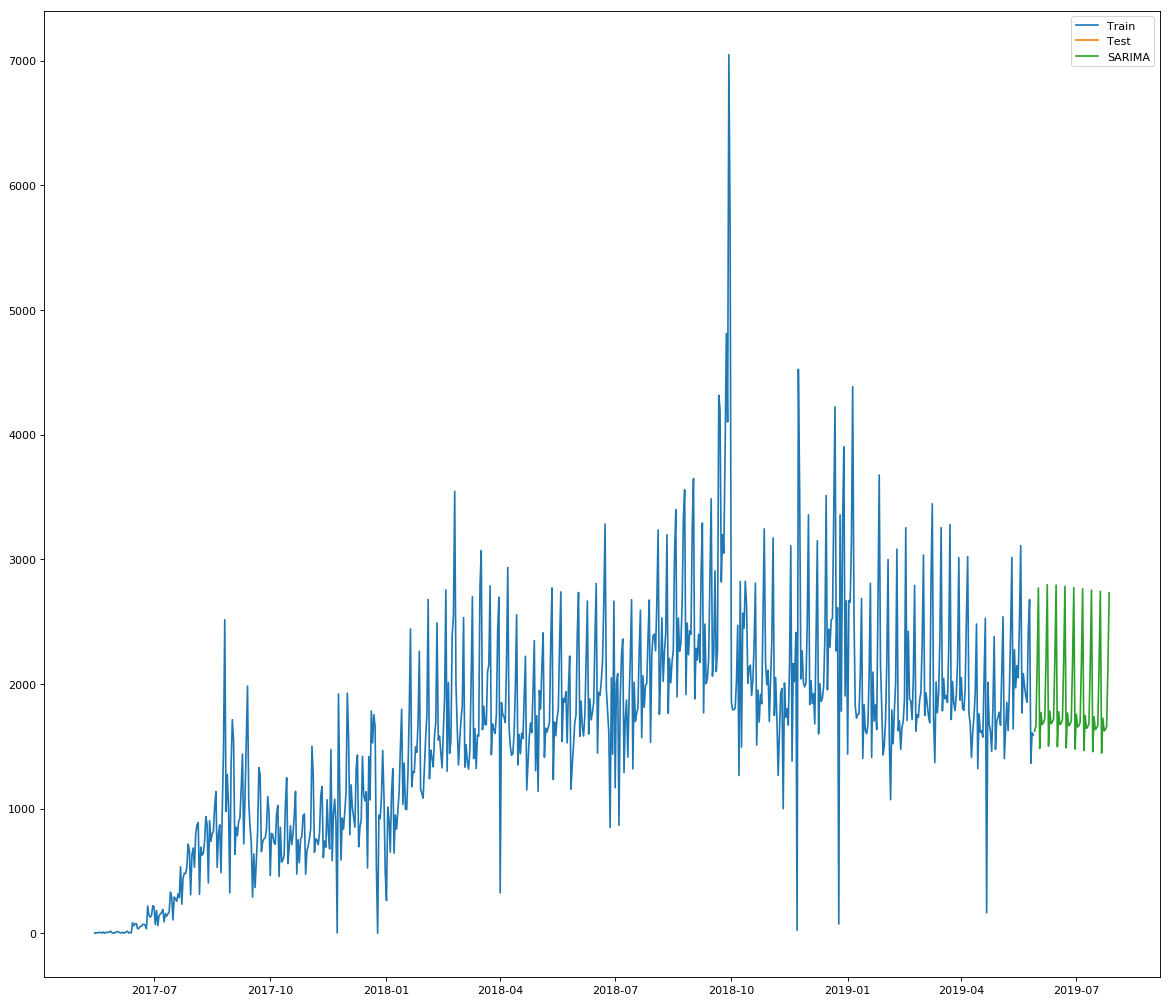

In [43]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
exog = train.iloc[:,1:4]
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.ordercount, exog=exog, order=(3, 1, 1),seasonal_order=(1,1,1,7), trend= "n", mle_regression = False, enforce_invertibility = False, measurement_error = False).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=maxd, end=maxd60, dynamic=True, exog=future.iloc[:,1:4])
plt.plot(train['ordercount'], label='Train')
plt.plot(future['ordercount'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [136]:
y_hat_avg['SARIMA'].to_csv(r"C:/Users/138577/Desktop/preds/May21preds.csv")

In [44]:
actualdate = np.repeat((str(df.index.max())[:10]),60,axis=0)

In [45]:
df1 = pd.DataFrame(columns = ['actualdate', 'actualvalue', 'predicteddate', 'predictedvalue', 'date_diff', 'prediction_cluster'])

In [46]:
df1['actualdate'] = actualdate
df1['actualdate'] = pd.to_datetime(df1['actualdate'])

In [47]:
df1['predictedvalue'] = y_hat_avg['SARIMA'].values

In [48]:
df1['predicteddate'] = date_list
df1['predicteddate'] = pd.to_datetime(df1['predicteddate'])

In [49]:
df1['date_diff'] = (df1['predicteddate'] - df1['actualdate'])
df1['date_diff'] = df1['date_diff'].dt.days

In [50]:
df1.loc[(df1.date_diff >= 0) | (df1.date_diff <= 9), 'prediction_cluster'] = 1

In [51]:
df1.head()

,actualdate,actualvalue,predicteddate,predictedvalue,date_diff,prediction_cluster
0,2019-05-28,NaN,2019-05-29,1619.487282,1,1
1,2019-05-28,NaN,2019-05-30,1665.292890,2,1
2,2019-05-28,NaN,2019-05-31,2149.253079,3,1
3,2019-05-28,NaN,2019-06-01,2768.709788,4,1
4,2019-05-28,NaN,2019-06-02,1482.874807,5,1
5,2019-05-28,NaN,2019-06-03,1771.185703,6,1
6,2019-05-28,NaN,2019-06-04,1674.234184,7,1
7,2019-05-28,NaN,2019-06-05,1690.495820,8,1
8,2019-05-28,NaN,2019-06-06,1719.594614,9,1
9,2019-05-28,NaN,2019-06-07,2189.352747,10,1
